In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from functools import partial

# Plot training and validation metrics
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [14]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 1024
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the VGGNet model
model = keras.models.Sequential()

model.add(keras.Input(shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Add more Conv2D and MaxPooling2D layers as needed

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('fer_vggnet.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

Found 28709 images belonging to 7 classes.
Epoch 1/20


ValueError: in user code:

    File "/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/venv/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_10' (type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (32, 48, 48, 3)
    
    Call arguments received by layer 'sequential_10' (type Sequential):
      • inputs=tf.Tensor(shape=(32, 48, 48, 3), dtype=float32)
      • training=True
      • mask=None


In [3]:
!pip install tensorflow_hub

  Obtaining dependency information for tensorflow_hub from https://files.pythonhosted.org/packages/6e/1a/fbae76f4057b9bcdf9468025d7a8ca952dec14bfafb9fc0b1e4244ce212f/tensorflow_hub-0.15.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 2.0 MB/s eta 0:00:00


Found 28709 images belonging to 7 classes.


2023-10-15 14:10:16.137699: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-10-15 14:10:16.137731: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-15 14:10:16.137738: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-15 14:10:16.137897: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-15 14:10:16.138075: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/20


2023-10-15 14:10:21.880684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 138s 4s/step - loss: 0.0000e+00 - categorical_accuracy: 0.2412 - val_loss: 1.9451 - val_categorical_accuracy: 0.2549
Epoch 2/20
32/32 [==============================] - 133s 4s/step - loss: 0.0000e+00 - categorical_accuracy: 0.2607 - val_loss: 1.9443 - val_categorical_accuracy: 0.2549
Epoch 3/20
32/32 [==============================] - 132s 4s/step - loss: 0.0000e+00 - categorical_accuracy: 0.2607 - val_loss: 1.9435 - val_categorical_accuracy: 0.2549
Epoch 4/20
32/32 [==============================] - 135s 4s/step - loss: 0.0000e+00 - categorical_accuracy: 0.2607 - val_loss: 1.9427 - val_categorical_accuracy: 0.2549
Epoch 5/20
32/32 [==============================] - 135s 4s/step - loss: 0.0000e+00 - categorical_accuracy: 0.2607 - val_loss: 1.9419 - val_categorical_accuracy: 0.2549
Epoch 6/20
32/32 [==============================] - 134s 4s/step - loss: 0.0000e+00 - categorical_accuracy: 0.2607 - val_loss: 1.9411 - val_categorical_accuracy: 0.25

KeyError: 'accuracy'

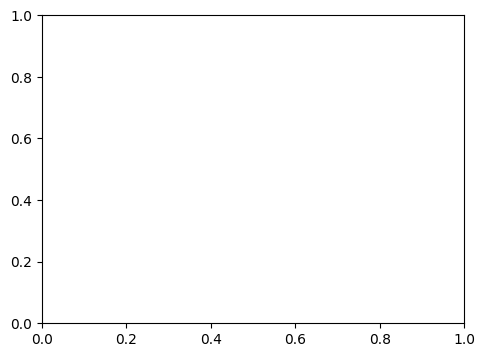

In [2]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (224, 224, 1)  # Input size for VGG16 (224x224 RGB images)
num_classes = 7  # Automatically determine the number of classes
batch_size = 1024
epochs = 20

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

model = keras.Sequential()
model.add(keras.Input(shape=(224, 224, 1)))
# Modify the initial layer to accept grayscale images
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Add more Conv2D and MaxPooling2D layers as needed

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate= 0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
plot_training_history(history)
# Save the model
model.save('fer_vgg16_pretrained.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

In [3]:
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Test accuracy: 25.49%


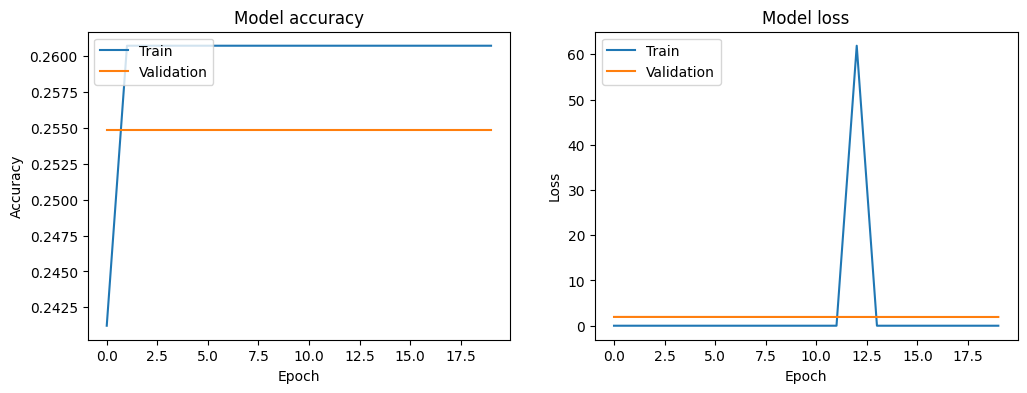

In [5]:
plot_training_history(history)

In [ ]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential()

# Add the VGG16 base model to your Sequential model
model.add(vgg16_base)

# Add your custom layers on top of VGG16
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [4]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 1024
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential()

# Add the VGG16 base model to your Sequential model
model.add(vgg16_base)

# Add your custom layers on top of VGG16
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('fer_vggnet_pretrained.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

Found 28709 images belonging to 7 classes.
Epoch 1/50
32/32 [==============================] - 3s 85ms/step - loss: 1.9491 - categorical_accuracy: 0.1846 - val_loss: 1.8685 - val_categorical_accuracy: 0.2656
Epoch 2/50
32/32 [==============================] - 3s 81ms/step - loss: 1.8907 - categorical_accuracy: 0.2266 - val_loss: 1.8362 - val_categorical_accuracy: 0.2656
Epoch 3/50
32/32 [==============================] - 3s 81ms/step - loss: 1.8438 - categorical_accuracy: 0.2314 - val_loss: 1.8656 - val_categorical_accuracy: 0.1953
Epoch 4/50
32/32 [==============================] - 3s 81ms/step - loss: 1.8449 - categorical_accuracy: 0.2246 - val_loss: 1.9147 - val_categorical_accuracy: 0.2656
Epoch 5/50
32/32 [==============================] - 3s 82ms/step - loss: 1.9025 - categorical_accuracy: 0.2432 - val_loss: 1.8828 - val_categorical_accuracy: 0.2656
Epoch 6/50
32/32 [==============================] - 3s 81ms/step - loss: 1.8702 - categorical_accuracy: 0.2432 - val_loss: 1.8473 - 

KeyboardInterrupt: 

Found 28709 images belonging to 7 classes.
Epoch 1/20
128/128 [==============================] - 11s 82ms/step - loss: 1.7363 - categorical_accuracy: 0.2974 - val_loss: 1.6132 - val_categorical_accuracy: 0.3770
Epoch 2/20
128/128 [==============================] - 10s 80ms/step - loss: 1.5726 - categorical_accuracy: 0.3921 - val_loss: 1.5627 - val_categorical_accuracy: 0.4055
Epoch 3/20
128/128 [==============================] - 10s 80ms/step - loss: 1.4136 - categorical_accuracy: 0.4634 - val_loss: 1.4851 - val_categorical_accuracy: 0.4285
Epoch 4/20
128/128 [==============================] - 10s 80ms/step - loss: 1.2841 - categorical_accuracy: 0.5188 - val_loss: 1.6063 - val_categorical_accuracy: 0.4053
Epoch 5/20
128/128 [==============================] - 10s 80ms/step - loss: 1.1585 - categorical_accuracy: 0.5723 - val_loss: 1.5550 - val_categorical_accuracy: 0.4382
Epoch 6/20
128/128 [==============================] - 10s 80ms/step - loss: 1.0112 - categorical_accuracy: 0.6187 - v

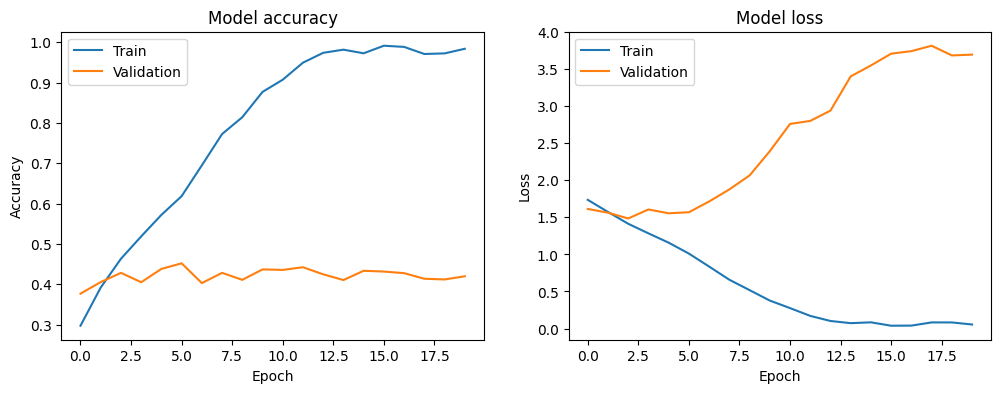

128/128 [==============================] - 2s 17ms/step - loss: 3.6953 - categorical_accuracy: 0.4199
Test accuracy: 41.99%
Time Taken for Execution:  211.52289509773254


In [7]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 4096
epochs = 20

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential()

# Add the VGG16 base model to your Sequential model
model.add(vgg16_base)

# Add your custom layers on top of VGG16
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('fer_vggnet_pretrained.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

Found 28709 images belonging to 7 classes.
Epoch 1/20
128/128 [==============================] - 12s 85ms/step - loss: 1.1965 - categorical_accuracy: 0.2891 - val_loss: 1.1702 - val_categorical_accuracy: 0.3655
Epoch 2/20
128/128 [==============================] - 11s 82ms/step - loss: 1.1586 - categorical_accuracy: 0.3911 - val_loss: 1.1512 - val_categorical_accuracy: 0.4114
Epoch 3/20
128/128 [==============================] - 11s 83ms/step - loss: 1.1301 - categorical_accuracy: 0.4570 - val_loss: 1.1404 - val_categorical_accuracy: 0.4397
Epoch 4/20
128/128 [==============================] - 11s 82ms/step - loss: 1.1070 - categorical_accuracy: 0.5149 - val_loss: 1.1365 - val_categorical_accuracy: 0.4463
Epoch 5/20
128/128 [==============================] - 11s 83ms/step - loss: 1.0865 - categorical_accuracy: 0.5667 - val_loss: 1.1401 - val_categorical_accuracy: 0.4458
Epoch 6/20
128/128 [==============================] - 11s 83ms/step - loss: 1.0626 - categorical_accuracy: 0.6140 - v

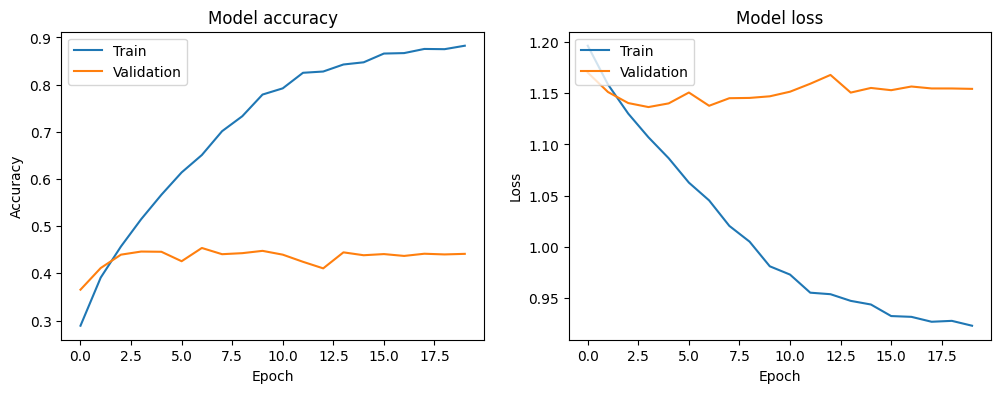

128/128 [==============================] - 2s 18ms/step - loss: 1.1543 - categorical_accuracy: 0.4414
Test accuracy: 44.14%
Time Taken for Execution:  219.74850988388062


In [10]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 4096
epochs = 20

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential()

# Add the VGG16 base model to your Sequential model
model.add(vgg16_base)

# Add your custom layers on top of VGG16
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='squared_hinge', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('fer_vggnet_pretrained_loss_sqauredhinge_lr_10-5.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

Found 28709 images belonging to 7 classes.
Epoch 1/20
128/128 [==============================] - 12s 86ms/step - loss: 1.1979 - categorical_accuracy: 0.2871 - val_loss: 1.1949 - val_categorical_accuracy: 0.3157
Epoch 2/20
128/128 [==============================] - 11s 82ms/step - loss: 1.1668 - categorical_accuracy: 0.3704 - val_loss: 1.1800 - val_categorical_accuracy: 0.3359
Epoch 3/20
128/128 [==============================] - 11s 83ms/step - loss: 1.1396 - categorical_accuracy: 0.4451 - val_loss: 1.1616 - val_categorical_accuracy: 0.3894
Epoch 4/20
128/128 [==============================] - 11s 83ms/step - loss: 1.1188 - categorical_accuracy: 0.4917 - val_loss: 1.1497 - val_categorical_accuracy: 0.4146
Epoch 5/20
128/128 [==============================] - 11s 83ms/step - loss: 1.0986 - categorical_accuracy: 0.5349 - val_loss: 1.1541 - val_categorical_accuracy: 0.4089
Epoch 6/20
128/128 [==============================] - 11s 83ms/step - loss: 1.0766 - categorical_accuracy: 0.5845 - v

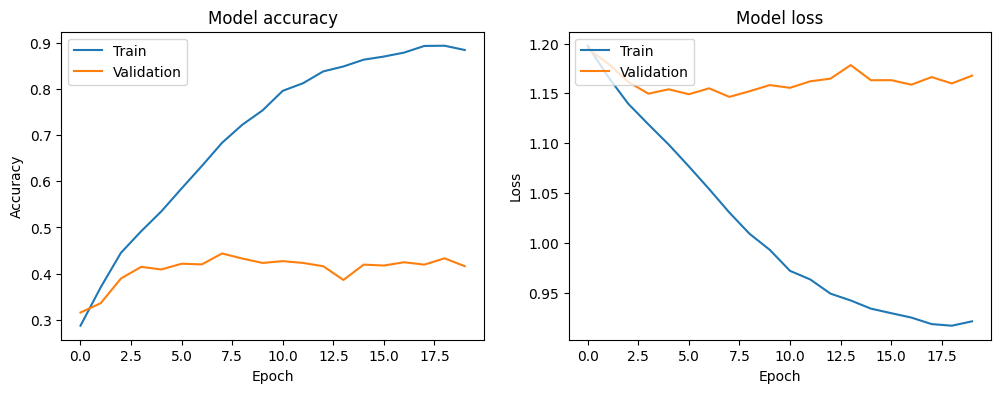

128/128 [==============================] - 2s 18ms/step - loss: 1.1678 - categorical_accuracy: 0.4160
Test accuracy: 41.60%
Time Taken for Execution:  219.7636480331421


In [11]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 4096
epochs = 20

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential()

# Add the VGG16 base model to your Sequential model
model.add(vgg16_base)

# Add your custom layers on top of VGG16
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='squared_hinge', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('fer_vggnet_pretrained_loss_sqauredhinge_lr_10-5.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

Found 28709 images belonging to 7 classes.
Epoch 1/20
128/128 [==============================] - 12s 87ms/step - loss: 1.2114 - categorical_accuracy: 0.2344 - val_loss: 1.2062 - val_categorical_accuracy: 0.2593
Epoch 2/20
128/128 [==============================] - 11s 82ms/step - loss: 1.2005 - categorical_accuracy: 0.2886 - val_loss: 1.1977 - val_categorical_accuracy: 0.2920
Epoch 3/20
128/128 [==============================] - 11s 83ms/step - loss: 1.1899 - categorical_accuracy: 0.3225 - val_loss: 1.1895 - val_categorical_accuracy: 0.3169
Epoch 4/20
128/128 [==============================] - 11s 82ms/step - loss: 1.1806 - categorical_accuracy: 0.3445 - val_loss: 1.1842 - val_categorical_accuracy: 0.3345
Epoch 5/20
128/128 [==============================] - 11s 82ms/step - loss: 1.1727 - categorical_accuracy: 0.3618 - val_loss: 1.1797 - val_categorical_accuracy: 0.3477
Epoch 6/20
128/128 [==============================] - 11s 83ms/step - loss: 1.1662 - categorical_accuracy: 0.3796 - v

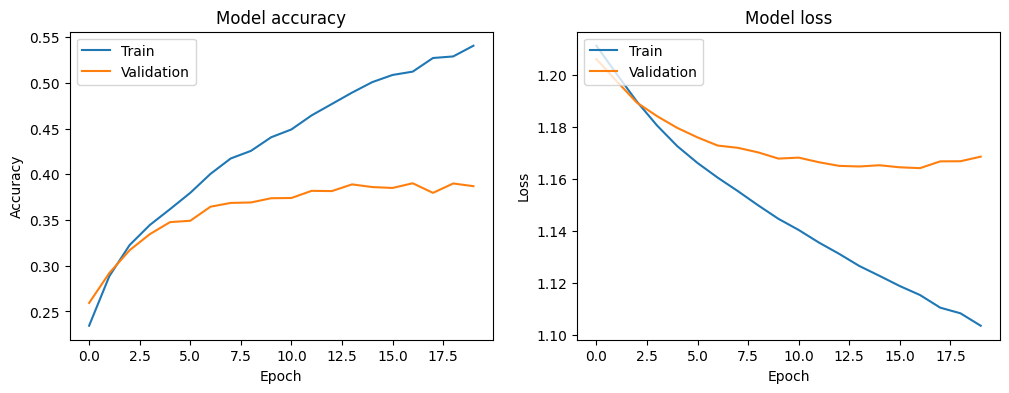

128/128 [==============================] - 2s 18ms/step - loss: 1.1686 - categorical_accuracy: 0.3870
Test accuracy: 38.70%
Time Taken for Execution:  219.6967601776123


In [13]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 4096
epochs = 20

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential()

# Add the VGG16 base model to your Sequential model
model.add(vgg16_base)

# Add your custom layers on top of VGG16
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.000001), loss='squared_hinge', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('fer_vggnet_pretrained_loss_sqauredhinge_lr_10-6.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

In [27]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.regularizers import l1, l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (224, 224, 3)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 512
epochs = 20

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the VGG16 model
model = keras.models.Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(4096, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(num_classes, activation='softmax'))


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='squared_hinge', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('fer_vgg16.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

Found 28709 images belonging to 7 classes.
Epoch 1/20
16/16 [==============================] - 23s 1s/step - loss: 138.6288 - categorical_accuracy: 0.2676 - val_loss: 117.7066 - val_categorical_accuracy: 0.2480
Epoch 2/20
16/16 [==============================] - 21s 1s/step - loss: 107.4083 - categorical_accuracy: 0.2676 - val_loss: 91.0638 - val_categorical_accuracy: 0.2480
Epoch 3/20
16/16 [==============================] - 21s 1s/step - loss: 82.5731 - categorical_accuracy: 0.2676 - val_loss: 70.5331 - val_categorical_accuracy: 0.2480
Epoch 4/20
16/16 [==============================] - 21s 1s/step - loss: 65.2174 - categorical_accuracy: 0.2676 - val_loss: 54.8675 - val_categorical_accuracy: 0.2480
Epoch 5/20
16/16 [==============================] - 21s 1s/step - loss: 50.2716 - categorical_accuracy: 0.2676 - val_loss: 42.9291 - val_categorical_accuracy: 0.2480
Epoch 6/20
16/16 [==============================] - 22s 1s/step - loss: 39.5086 - categorical_accuracy: 0.2676 - val_loss: 3

KeyboardInterrupt: 

Found 28709 images belonging to 7 classes.
Epoch 1/20
128/128 [==============================] - 15s 111ms/step - loss: 2637.8508 - categorical_accuracy: 0.0671 - val_loss: 2625.7007 - val_categorical_accuracy: 0.1726
Epoch 2/20
128/128 [==============================] - 14s 107ms/step - loss: 2613.7800 - categorical_accuracy: 0.2427 - val_loss: 2601.6941 - val_categorical_accuracy: 0.2639
Epoch 3/20
128/128 [==============================] - 14s 107ms/step - loss: 2589.8374 - categorical_accuracy: 0.2695 - val_loss: 2577.8096 - val_categorical_accuracy: 0.2852
Epoch 4/20
128/128 [==============================] - 14s 107ms/step - loss: 2566.0093 - categorical_accuracy: 0.2949 - val_loss: 2554.0366 - val_categorical_accuracy: 0.3193
Epoch 5/20
128/128 [==============================] - 14s 107ms/step - loss: 2542.2920 - categorical_accuracy: 0.3286 - val_loss: 2530.3789 - val_categorical_accuracy: 0.3408
Epoch 6/20
128/128 [==============================] - 14s 107ms/step - loss: 2518.

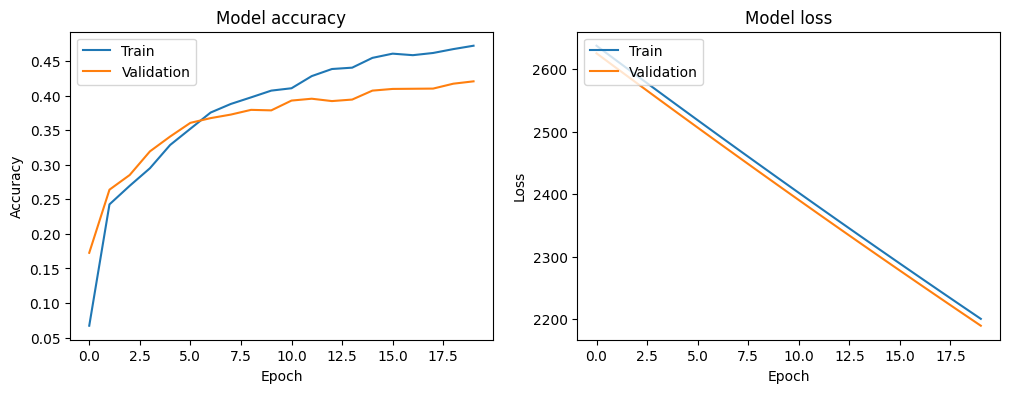

128/128 [==============================] - 3s 24ms/step - loss: 2189.7375 - categorical_accuracy: 0.4207
Test accuracy: 42.07%
Time Taken for Execution:  284.5691931247711


In [28]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications import VGG16
from keras.regularizers import l1, l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 4096
epochs = 20

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential()

# Add the VGG16 base model to your Sequential model
model.add(vgg16_base)

# Add your custom layers on top of VGG16
model.add(Flatten())
model.add(Dense(4096, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(4096, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.000001), loss='squared_hinge', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('fer_vggnet_pretrained_loss_sqauredhinge_lr_10-6.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

Found 28709 images belonging to 7 classes.
Epoch 1/50
128/128 [==============================] - 16s 114ms/step - loss: 2637.6960 - categorical_accuracy: 0.1445 - val_loss: 2625.5596 - val_categorical_accuracy: 0.1680
Epoch 2/50
128/128 [==============================] - 14s 108ms/step - loss: 2613.6392 - categorical_accuracy: 0.2410 - val_loss: 2601.5571 - val_categorical_accuracy: 0.2507
Epoch 3/50
128/128 [==============================] - 14s 107ms/step - loss: 2589.6953 - categorical_accuracy: 0.2646 - val_loss: 2577.6711 - val_categorical_accuracy: 0.2654
Epoch 4/50
128/128 [==============================] - 14s 107ms/step - loss: 2569.0708 - categorical_accuracy: 0.2898 - val_loss: 2553.8967 - val_categorical_accuracy: 0.2844
Epoch 5/50
128/128 [==============================] - 14s 107ms/step - loss: 2542.1416 - categorical_accuracy: 0.3167 - val_loss: 2530.2322 - val_categorical_accuracy: 0.3137
Epoch 6/50
128/128 [==============================] - 14s 108ms/step - loss: 2523.

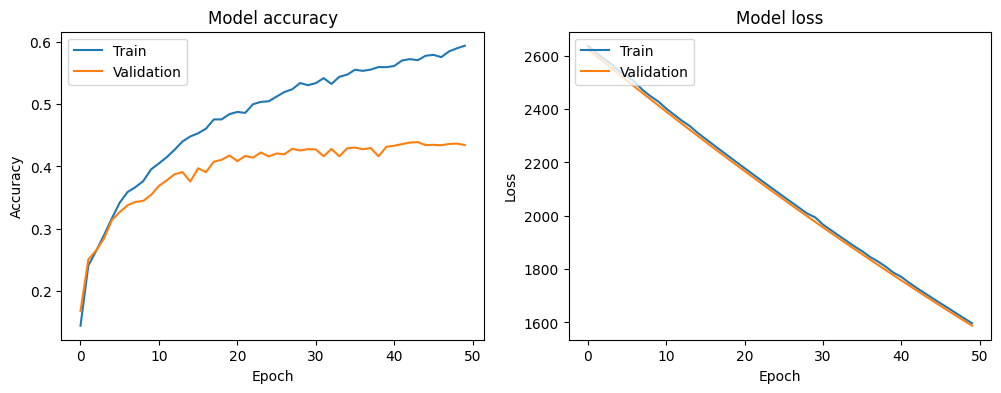

128/128 [==============================] - 3s 24ms/step - loss: 1587.8633 - categorical_accuracy: 0.4343
Test accuracy: 43.43%
Time Taken for Execution:  696.176913022995


In [30]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications import VGG16
from keras.regularizers import l1, l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 4096
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential()

# Add the VGG16 base model to your Sequential model
model.add(vgg16_base)

# Add your custom layers on top of VGG16
model.add(Flatten())
model.add(Dense(4096, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(4096, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.000001), loss='squared_hinge', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('fer_vggnet_pretrained_loss_sqauredhinge_lr_10-6.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

Found 28709 images belonging to 7 classes.
Epoch 1/50
16/16 [==============================] - 4s 161ms/step - loss: 2648.1570 - categorical_accuracy: 0.1113 - val_loss: 2646.5525 - val_categorical_accuracy: 0.1035
Epoch 2/50
16/16 [==============================] - 2s 116ms/step - loss: 2645.1370 - categorical_accuracy: 0.1113 - val_loss: 2643.5342 - val_categorical_accuracy: 0.1191
Epoch 3/50
16/16 [==============================] - 2s 112ms/step - loss: 2642.1194 - categorical_accuracy: 0.1680 - val_loss: 2640.5173 - val_categorical_accuracy: 0.1484
Epoch 4/50
16/16 [==============================] - 2s 112ms/step - loss: 2639.1028 - categorical_accuracy: 0.2598 - val_loss: 2637.5017 - val_categorical_accuracy: 0.2246
Epoch 5/50
16/16 [==============================] - 2s 111ms/step - loss: 2636.0879 - categorical_accuracy: 0.2891 - val_loss: 2634.4885 - val_categorical_accuracy: 0.2559
Epoch 6/50
16/16 [==============================] - 2s 119ms/step - loss: 2633.0745 - categorical

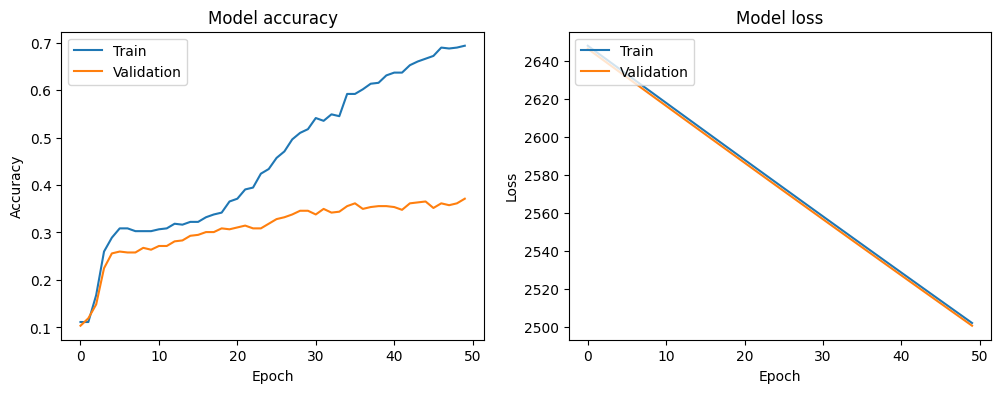

16/16 [==============================] - 0s 24ms/step - loss: 2500.7339 - categorical_accuracy: 0.3711
Test accuracy: 37.11%
Time Taken for Execution:  91.93854904174805


In [33]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications import VGG16
from keras.regularizers import l1, l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 512
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential()

# Add the VGG16 base model to your Sequential model
model.add(vgg16_base)

# Add your custom layers on top of VGG16
model.add(Flatten())
model.add(Dense(4096, activation='leaky_relu', kernel_regularizer=l1(0.01)))
model.add(Dense(4096, activation='leaky_relu', kernel_regularizer=l1(0.01)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.000001), loss='squared_hinge', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('fer_vggnet_pretrained_loss_sqauredhinge_lr_10-6_leakyrelu.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

Found 28709 images belonging to 7 classes.
Epoch 1/50
16/16 [==============================] - 4s 153ms/step - loss: 2650.5422 - categorical_accuracy: 0.1230 - val_loss: 2650.0181 - val_categorical_accuracy: 0.1328
Epoch 2/50
16/16 [==============================] - 2s 104ms/step - loss: 2649.5881 - categorical_accuracy: 0.1230 - val_loss: 2649.0686 - val_categorical_accuracy: 0.1348
Epoch 3/50
16/16 [==============================] - 2s 106ms/step - loss: 2648.6414 - categorical_accuracy: 0.1289 - val_loss: 2648.1274 - val_categorical_accuracy: 0.1367
Epoch 4/50
16/16 [==============================] - 2s 102ms/step - loss: 2647.7034 - categorical_accuracy: 0.1309 - val_loss: 2647.1938 - val_categorical_accuracy: 0.1348
Epoch 5/50
16/16 [==============================] - 2s 101ms/step - loss: 2646.7729 - categorical_accuracy: 0.1309 - val_loss: 2646.2673 - val_categorical_accuracy: 0.1406
Epoch 6/50
16/16 [==============================] - 2s 101ms/step - loss: 2645.8494 - categorical

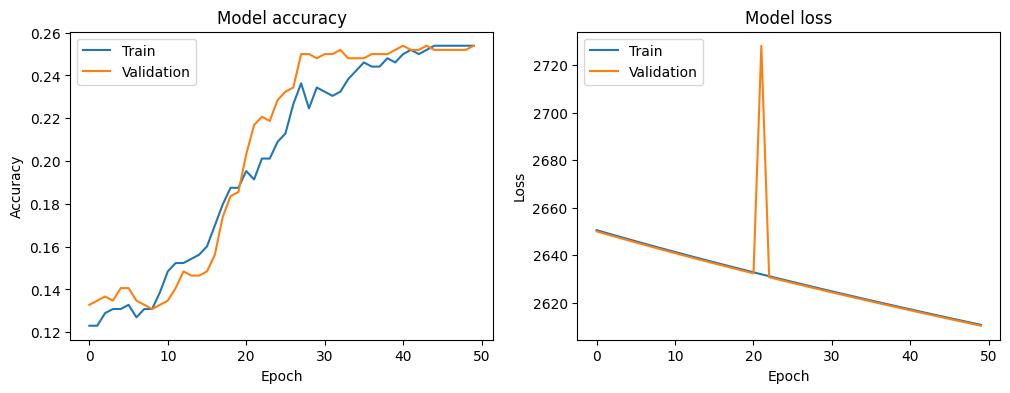

16/16 [==============================] - 0s 27ms/step - loss: 2610.2769 - categorical_accuracy: 0.2539
Test accuracy: 25.39%
Time Taken for Execution:  84.04265999794006


In [43]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications import VGG16
from keras.regularizers import l1, l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.optimizers.legacy import Adagrad

from sklearn.model_selection import train_test_split
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 512
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential()

# Add the VGG16 base model to your Sequential model
model.add(vgg16_base)

# Add your custom layers on top of VGG16
model.add(Flatten())
model.add(Dense(4096, activation='leaky_relu', kernel_regularizer=l1(0.01)))
model.add(Dense(4096, activation='leaky_relu', kernel_regularizer=l1(0.01)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adagrad(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('fer_vggnet_pretrained_loss_sqauredhinge_lr_10-6_leakyrelu.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

Found 28709 images belonging to 7 classes.
Epoch 1/20
128/128 [==============================] - 17s 118ms/step - loss: 13183.7793 - categorical_accuracy: 0.1831 - val_loss: 13123.0957 - val_categorical_accuracy: 0.2305
Epoch 2/20
128/128 [==============================] - 15s 114ms/step - loss: 13063.5156 - categorical_accuracy: 0.2578 - val_loss: 13003.1182 - val_categorical_accuracy: 0.2583
Epoch 3/20
128/128 [==============================] - 14s 109ms/step - loss: 12970.9561 - categorical_accuracy: 0.2627 - val_loss: 12883.6904 - val_categorical_accuracy: 0.2600
Epoch 4/20
128/128 [==============================] - 14s 106ms/step - loss: 12824.6738 - categorical_accuracy: 0.2725 - val_loss: 12764.8242 - val_categorical_accuracy: 0.2722
Epoch 5/20
128/128 [==============================] - 14s 106ms/step - loss: 12706.0820 - categorical_accuracy: 0.2920 - val_loss: 12646.5088 - val_categorical_accuracy: 0.3088
Epoch 6/20
128/128 [==============================] - 13s 105ms/step - l

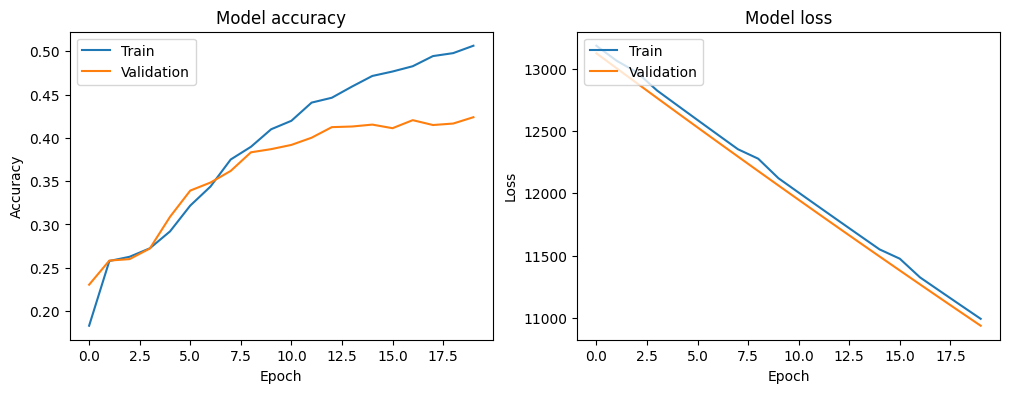

128/128 [==============================] - 3s 24ms/step - loss: 10938.7500 - categorical_accuracy: 0.4238
Test accuracy: 42.38%
Time Taken for Execution:  289.36655497550964


In [44]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications import VGG16
from keras.regularizers import l1, l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 4096
epochs = 20

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential()

# Add the VGG16 base model to your Sequential model
model.add(vgg16_base)

# Add your custom layers on top of VGG16
model.add(Flatten())
model.add(Dense(4096, activation='relu', kernel_regularizer=l1(0.05)))
model.add(Dense(4096, activation='relu', kernel_regularizer=l1(0.05)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.000001), loss='squared_hinge', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('fer_vggnet_pretrained_loss_sqauredhinge_lr_10-6.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

Found 28709 images belonging to 7 classes.
Epoch 1/100
128/128 [==============================] - 17s 120ms/step - loss: 12652.1064 - categorical_accuracy: 0.2615 - val_loss: 12062.0996 - val_categorical_accuracy: 0.3064
Epoch 2/100
128/128 [==============================] - 13s 105ms/step - loss: 11499.5537 - categorical_accuracy: 0.3687 - val_loss: 10937.4951 - val_categorical_accuracy: 0.3721
Epoch 3/100
128/128 [==============================] - 14s 106ms/step - loss: 10402.5254 - categorical_accuracy: 0.4321 - val_loss: 9868.4980 - val_categorical_accuracy: 0.3979
Epoch 4/100
128/128 [==============================] - 14s 106ms/step - loss: 9361.0781 - categorical_accuracy: 0.4617 - val_loss: 8855.0430 - val_categorical_accuracy: 0.3916
Epoch 5/100
128/128 [==============================] - 13s 105ms/step - loss: 8375.1738 - categorical_accuracy: 0.4873 - val_loss: 7897.1548 - val_categorical_accuracy: 0.4246
Epoch 6/100
128/128 [==============================] - 13s 104ms/step - 

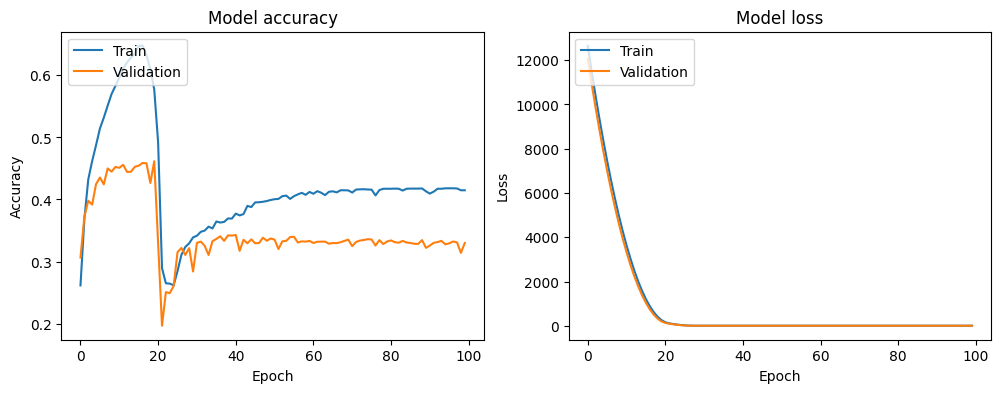

128/128 [==============================] - 3s 24ms/step - loss: 2.1557 - categorical_accuracy: 0.3298
Test accuracy: 32.98%
Time Taken for Execution:  1384.4135580062866


In [45]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

start_time = time.time()
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 4096
epochs = 100

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Set to the input size of VGGNet
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

model = Sequential()

# Add the VGG16 base model to your Sequential model
model.add(vgg16_base)

# Add your custom layers on top of VGG16
model.add(Flatten())
model.add(Dense(4096, activation='relu', kernel_regularizer=l1(0.05)))
model.add(Dense(4096, activation='relu', kernel_regularizer=l1(0.05)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='squared_hinge', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)
plot_training_history(history)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('fer_vggnet_pretrained_loss_squaredhinge_lr_10-5_l1.keras')
end_time = time.time()
print("Time Taken for Execution: ", (end_time - start_time))

In [17]:
import os
import cv2

# Define the input and output directories
input_dir = "data"
output_dir = "resized_data"

# Define the target size (224x224)
target_size = (224, 224)

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to resize and save an image
def resize_and_save_image(input_path, output_path):
    image = cv2.imread(input_path)
    if image is not None:
        resized_image = cv2.resize(image, target_size)
        cv2.imwrite(output_path, resized_image)

# Recursively process directories and subdirectories
for dataset_dir in ["train", "test"]:
    dataset_input_dir = os.path.join(input_dir, dataset_dir)
    dataset_output_dir = os.path.join(output_dir, dataset_dir)
    
    if not os.path.exists(dataset_output_dir):
        os.makedirs(dataset_output_dir)
    
    for root, dirs, files in os.walk(dataset_input_dir):
        for emotion_folder in dirs[:]:
            # Ignore .DS_Store files
            if emotion_folder == ".DS_Store":
                dirs.remove(emotion_folder)
                continue

            emotion_input_dir = os.path.join(root, emotion_folder)
            emotion_output_dir = os.path.join(root.replace(input_dir, output_dir), emotion_folder)
            
            if not os.path.exists(emotion_output_dir):
                os.makedirs(emotion_output_dir)
            
            for filename in files:
                if filename.endswith(".jpg") or filename.endswith(".png"):
                    input_path = os.path.join(emotion_input_dir, filename)
                    output_path = os.path.join(emotion_output_dir, filename)
                    resize_and_save_image(input_path, output_path)

print("Image resizing complete.")

Image resizing complete.


In [19]:
import os

# Define the directory to clean up
directory_to_clean = "resized_data"

# Function to remove .DS_Store files recursively
def remove_ds_store(directory):
    for root, dirs, files in os.walk(directory):
        for ds_store in [f for f in files if f == ".DS_Store"]:
            ds_store_path = os.path.join(root, ds_store)
            os.remove(ds_store_path)

# Clean up the directory
remove_ds_store(directory_to_clean)

print("Removed .DS_Store files.")


Removed .DS_Store files.


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the training and testing directories
train_dir = 'data/train'
test_dir = 'data/test'

# Define constants
input_shape = (48, 48, 1)  # FER2013 image size is 48x48 with 1 channel (grayscale)
num_classes = 7  # 7 emotional categories in FER2013

# Create a data generator for data augmentation (optional)
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Build the CNN model
model = keras.Sequential()

# VGG16-like architecture
# Block 1
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Block 3
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

# Output layer
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

# Print a summary of the model
model.summary()

# Training the model
batch_size = 128
epochs = 20

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

# Save the model
model.save("fer2013_cnn_model_customvgg16.keras")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 128)       0         
 g2D)                                                 

KeyboardInterrupt: 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam

# Define paths to the training and testing directories
train_dir = 'data/train'
test_dir = 'data/test'

# Define constants
input_shape = (48, 48, 1)  # FER2013 image size is 48x48 with 1 channel (grayscale)
num_classes = 7  # 7 emotional categories in FER2013

# Create a data generator for data augmentation (optional)
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Build the CNN model
model = keras.Sequential()

# VGG16-like architecture
# Block 1
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Block 3
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))  # Increase the number of units
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))  # Increase the number of units
model.add(layers.BatchNormalization())

# Output layer
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Experiment with learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print a summary of the model
model.summary()

# Training the model
batch_size = 128
epochs = 50  # Increase the number of epochs

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,  # Adjust patience as needed
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# Save the model
model.save("fer2013_cnn_model_customvgg16_updated.h5")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2023-10-18 11:17:03.348888: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-10-18 11:17:03.348907: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-18 11:17:03.348913: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-18 11:17:03.348946: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-18 11:17:03.348965: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                        

2023-10-18 11:17:05.586466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-10-18 11:17:05.691729: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


225/225 [==============================] - 35s 148ms/step - loss: 1.8359 - accuracy: 0.2881 - val_loss: 1.9304 - val_accuracy: 0.2471
Epoch 2/50
225/225 [==============================] - 33s 145ms/step - loss: 1.6131 - accuracy: 0.3664 - val_loss: 1.7257 - val_accuracy: 0.3522
Epoch 3/50
225/225 [==============================] - 32s 144ms/step - loss: 1.4753 - accuracy: 0.4289 - val_loss: 1.7228 - val_accuracy: 0.4042
Epoch 4/50
225/225 [==============================] - 33s 145ms/step - loss: 1.3867 - accuracy: 0.4686 - val_loss: 1.5906 - val_accuracy: 0.4177
Epoch 5/50
225/225 [==============================] - 33s 145ms/step - loss: 1.3152 - accuracy: 0.4979 - val_loss: 1.3492 - val_accuracy: 0.5084
Epoch 6/50
225/225 [==============================] - 33s 145ms/step - loss: 1.2670 - accuracy: 0.5212 - val_loss: 1.2826 - val_accuracy: 0.5195
Epoch 7/50
225/225 [==============================] - 32s 144ms/step - loss: 1.2223 - accuracy: 0.5360 - val_loss: 1.3215 - val_accuracy: 0.5

/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/57 [==============================] - 2s 36ms/step - loss: 1.0207 - accuracy: 0.6329
Test Accuracy: 63.29%


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_9 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_10 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                      

2023-10-18 11:52:21.491477: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


225/225 [==============================] - 34s 146ms/step - loss: 1.8271 - accuracy: 0.2899 - val_loss: 1.9832 - val_accuracy: 0.2293 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 33s 145ms/step - loss: 1.6490 - accuracy: 0.3537 - val_loss: 1.8570 - val_accuracy: 0.2749 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 33s 145ms/step - loss: 1.5110 - accuracy: 0.4165 - val_loss: 1.6722 - val_accuracy: 0.3909 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 33s 145ms/step - loss: 1.4340 - accuracy: 0.4432 - val_loss: 1.4118 - val_accuracy: 0.4677 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 33s 145ms/step - loss: 1.3650 - accuracy: 0.4763 - val_loss: 1.3619 - val_accuracy: 0.4854 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - 33s 145ms/step - loss: 1.3086 - accuracy: 0.5001 - val_loss: 1.2983 - val_accuracy: 0.5091 - lr: 0.0010
Epoch 7/50
225/225 [==============================] - 33s 145ms

/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/57 [==============================] - 2s 35ms/step - loss: 0.9562 - accuracy: 0.6482
Test Accuracy: 64.82%
57/57 [==============================] - 2s 33ms/step


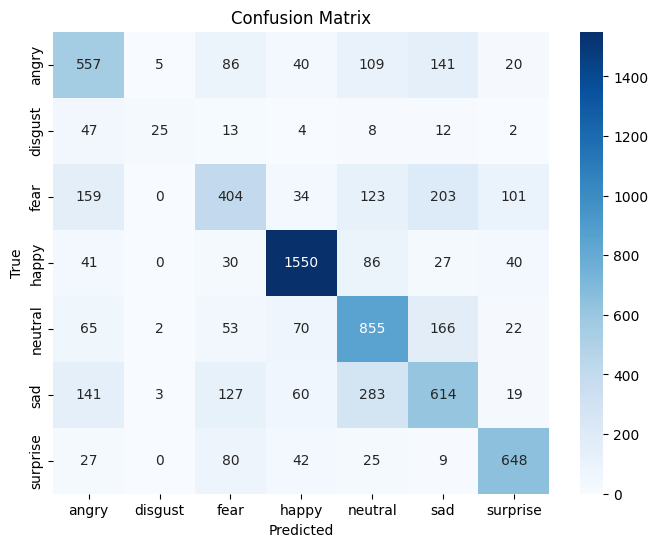

              precision    recall  f1-score   support

       angry       0.54      0.58      0.56       958
     disgust       0.71      0.23      0.34       111
        fear       0.51      0.39      0.44      1024
       happy       0.86      0.87      0.87      1774
     neutral       0.57      0.69      0.63      1233
         sad       0.52      0.49      0.51      1247
    surprise       0.76      0.78      0.77       831

    accuracy                           0.65      7178
   macro avg       0.64      0.58      0.59      7178
weighted avg       0.65      0.65      0.64      7178


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths to the training and testing directories
train_dir = 'data/train'
test_dir = 'data/test'

# Define constants
input_shape = (48, 48, 1)  # FER2013 image size is 48x48 with 1 channel (grayscale)
num_classes = 7  # 7 emotional categories in FER2013

# Create a data generator for data augmentation (optional)
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Build the CNN model
model = keras.Sequential()

# VGG16-like architecture
# Block 1
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Block 3
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))  # Increase the number of units
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))  # Increase the number of units
model.add(layers.BatchNormalization())

# Output layer
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Experiment with learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print a summary of the model
model.summary()

# Training the model
batch_size = 128
epochs = 50  # Increase the number of epochs

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of predictions
)

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,  # Adjust patience as needed
    restore_best_weights=True
)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001
)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=[early_stopping, lr_scheduler]
)

# Save the model
model.save("fer2013_cnn_model_customvgg16_updated.h5")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get true labels and predictions
true_labels = test_generator.classes
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="Blues", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)